In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [2]:
transform = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input, validation_split=0.2)
train_ds = transform.flow_from_directory(
    "./Datasets/car/train_brand_and_model_2",
    subset="training", seed = 42,target_size=[224,224],batch_size=32
)
val_ds = transform.flow_from_directory(
    "./Datasets/car/train_brand_and_model_2",
    subset="validation", seed = 42,target_size=[224,224],batch_size=32
)

Found 10413 images belonging to 157 classes.
Found 2535 images belonging to 157 classes.


In [3]:
inputs = keras.Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=True, input_tensor=inputs)
last_layer = base_model.layers[-2].output 
out = Dense(units = 157, activation = 'softmax', name = 'ouput')(last_layer)
new_base_model = Model(inputs = inputs, outputs = out)

In [4]:
for layer in new_base_model.layers[:-25]:
  layer.trainable = False
new_base_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [5]:
new_base_model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [6]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode = 'max')

In [7]:
history = new_base_model.fit_generator(generator = train_ds, epochs=5,  validation_data = val_ds)


C:\Users\Innomer\AppData\Local\Temp\ipykernel_19628\347769587.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_base_model.fit_generator(generator = train_ds, epochs=5,  validation_data = val_ds)


Epoch 1/5
326/326 [==============================] - 64s 162ms/step - loss: 3.0414 - accuracy: 0.2928 - val_loss: 2.4901 - val_accuracy: 0.3712
Epoch 2/5
326/326 [==============================] - 50s 154ms/step - loss: 1.1224 - accuracy: 0.6868 - val_loss: 2.0693 - val_accuracy: 0.4903
Epoch 3/5
326/326 [==============================] - 55s 168ms/step - loss: 0.4960 - accuracy: 0.8586 - val_loss: 1.4788 - val_accuracy: 0.6087
Epoch 4/5
326/326 [==============================] - 49s 150ms/step - loss: 0.2248 - accuracy: 0.9403 - val_loss: 1.5662 - val_accuracy: 0.5886
Epoch 5/5
326/326 [==============================] - 49s 151ms/step - loss: 0.1474 - accuracy: 0.9620 - val_loss: 1.5847 - val_accuracy: 0.6114


In [8]:
new_base_model.save('./Models/resnet_50') 

INFO:tensorflow:Assets written to: ./Models/resnet_50\assets


INFO:tensorflow:Assets written to: ./Models/resnet_50\assets


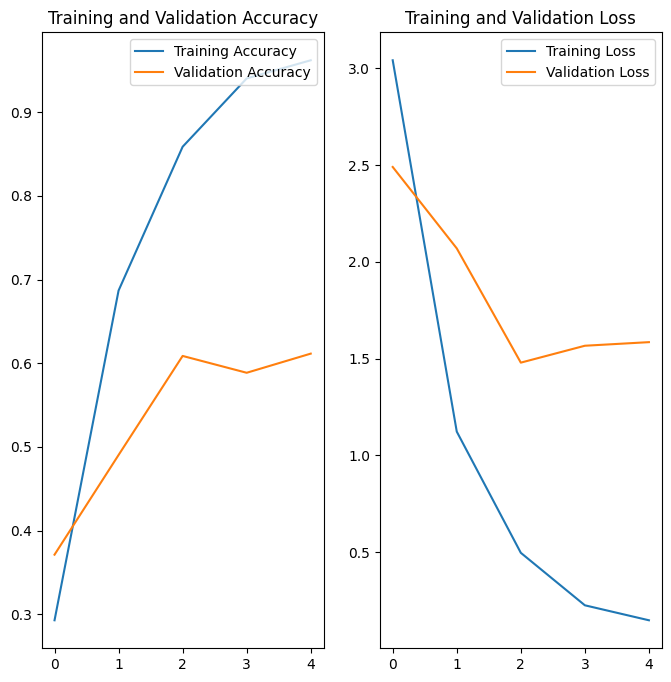

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
transform_test = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input)
test_ds = transform_test.flow_from_directory(
    "./Datasets/car/test_brand_and_model_2",
    seed = 42,target_size=[224,224],batch_size=32
)

Found 3237 images belonging to 157 classes.


In [11]:
new_base_model.evaluate(test_ds)

102/102 [==============================] - 14s 135ms/step - loss: 1.5174 - accuracy: 0.6284


[1.5173841714859009, 0.6283596158027649]

In [12]:
history = new_base_model.fit_generator(generator = train_ds, epochs=5,  validation_data = val_ds)


Epoch 1/5


C:\Users\Innomer\AppData\Local\Temp\ipykernel_19628\347769587.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_base_model.fit_generator(generator = train_ds, epochs=5,  validation_data = val_ds)


326/326 [==============================] - 48s 147ms/step - loss: 0.0841 - accuracy: 0.9798 - val_loss: 1.2640 - val_accuracy: 0.6663
Epoch 2/5
326/326 [==============================] - 48s 148ms/step - loss: 0.0822 - accuracy: 0.9787 - val_loss: 1.8053 - val_accuracy: 0.5972
Epoch 3/5
326/326 [==============================] - 55s 170ms/step - loss: 0.1035 - accuracy: 0.9738 - val_loss: 1.6178 - val_accuracy: 0.6288
Epoch 4/5
326/326 [==============================] - 53s 162ms/step - loss: 0.0830 - accuracy: 0.9770 - val_loss: 2.1005 - val_accuracy: 0.5720
Epoch 5/5
326/326 [==============================] - 47s 144ms/step - loss: 0.0749 - accuracy: 0.9810 - val_loss: 1.9579 - val_accuracy: 0.5862
